# Notebook for Lab 1 - CCD Characterization
## Alexandrea Moreno
## Jaden Luong
## Ryan Dunn
#
#
### 5.2 Measuring the Read Noise

Image minimum =  644.0
Image maximum =  805.0
Image mean =  726.21436
Image standard deviation =  16.031504
Selecting pixel values between  700  and  750
Image minimum =  700.0
Image maximum =  750.0
Image mean =  725.5995
Image standard deviation =  12.281404


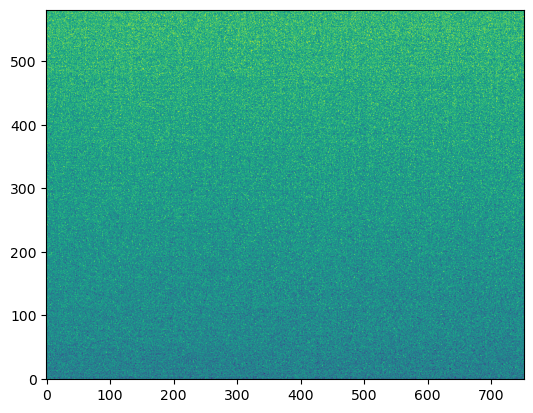

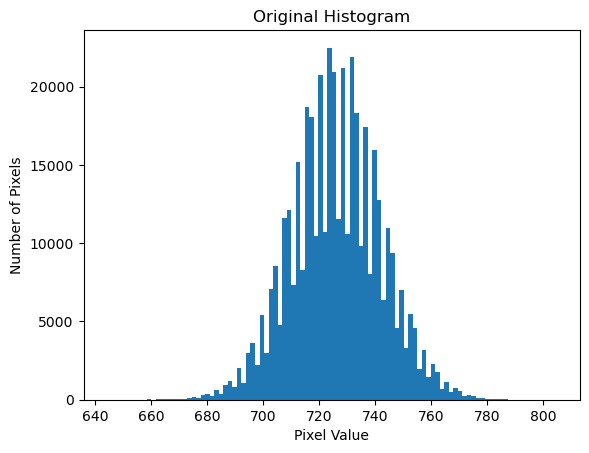

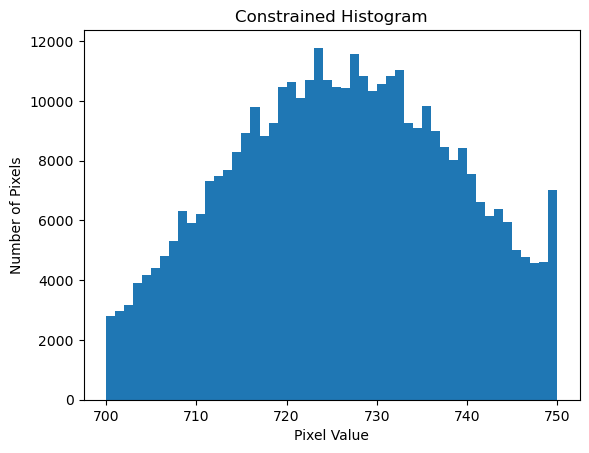

In [ ]:
# # Python program to load a FITS image and display it

# import needed extensions
import numpy
import matplotlib.pyplot as plt # plotting package
import matplotlib.cm as cm # colormaps
import astropy.io.fits as pyfits

# read in the file
# change input.fits to the name of your file
h = pyfits.open(r"E:\school\2025 Fall\Observational Astro\Lab 1 - CCD Characterization\bias_19C_001.fits")

# copy the image data into a numpy (numerical python) array
img = h[0].data

plt.ion() # do plots in interactive mode    
colmap = plt.get_cmap('viridis') # load gray colormap

# plot the image on the screen
plt.figure(1)
plt.clf()
plt.imshow(img, cmap=colmap, vmin=660, vmax=780, origin='lower') # plot image using gray colorbar

# img is a 2-d array, need to change to 1-d to make a histogram
nx, ny = img.shape # find the size of the array
imgh = numpy.reshape(img, nx*ny) # change the shape to be 1d

# print some statistics about the image
print('Image minimum = ', numpy.min(imgh))
print('Image maximum = ', numpy.max(imgh))
print('Image mean = ', numpy.mean(imgh))
print('Image standard deviation = ', numpy.std(imgh))

# now plot a histogram of the image values
plt.figure(2)
plt.clf()
plt.title("Original Histogram")
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.hist(imgh, bins=100) #, histtype='stepfilled')

'''
    UNCOMMENT AFTER FIRST HISTOGRAM IS CREATED
'''
# select pixels with values within a range
plow = 700
phi = 750
print('Selecting pixel values between ', plow, ' and ', phi)
q = numpy.where((imgh >= plow) & (imgh <= phi))
imghcut = imgh[q]

print('Image minimum = ',numpy. min(imghcut))
print('Image maximum = ', numpy.max(imghcut))
print('Image mean = ', numpy.mean(imghcut))
print('Image standard deviation = ', numpy.std(imghcut))

# now plot a histogram of the image values
plt.figure(3)
plt.clf()
plt.title("Constrained Histogram")
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.hist(imghcut, bins=50) #, histtype='stepfilled')
plt.savefig('histogram_L1.png')
plt.show() # display the plots


In [ ]:
# Purposes: 
#   - calculate statistics of CCD dark images 
#   - fit a curve to dark count vs. time relation

# import needed extensions
from numpy import *
import matplotlib.pyplot as plt # plotting package
import matplotlib.cm as cm # colormaps
from scipy import stats
import astropy.io.fits as pyfits
from glob import glob

plt.ion()

# name of files containing the bias frames
biasfiles = glob('bias_19C_*.fits')

# Make an averaged bias frame from all of the bias frames
master_bias=[]
for i in biasfiles:
    # read in the bias file
    h = pyfits.open(i)
    # copy the image data into a numpy (numerical python) array
    data = h[0].data
    h.close()
    master_bias.append(data)
master_bias = asarray(master_bias)
bias = mean(master_bias, axis=0)
pyfits.writeto('master_bias.fits', bias, overwrite=True)
print("Bias frame created")




Bias frame created


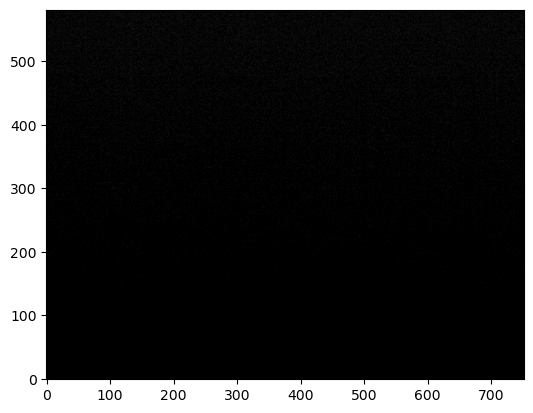

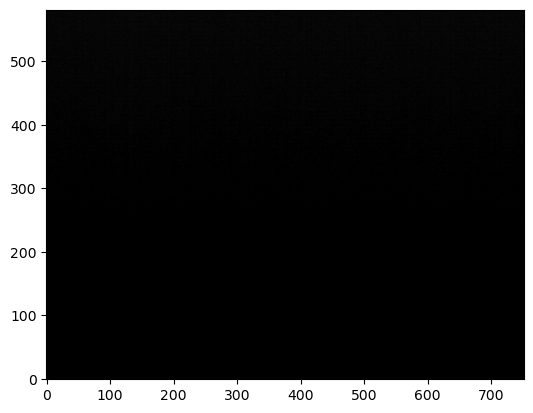

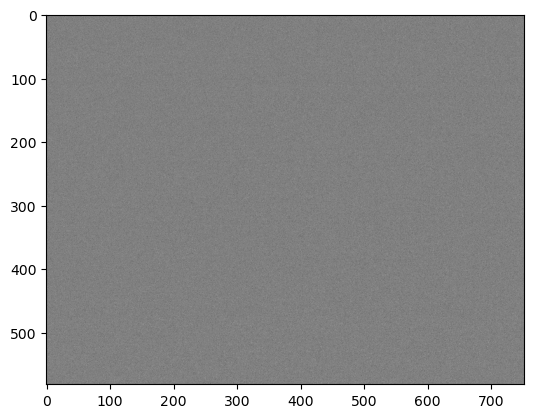

In [10]:
# Python program to load a FITS image and display it

# import needed extensions
from numpy import *
import matplotlib.pyplot as plt # plotting package
import matplotlib.cm as cm # colormaps
import astropy.io.fits as pyfits

# read in the files
# change the file names as appropriate
h1 = pyfits.open(r"E:\school\2025 Fall\Observational Astro\Lab 1 - CCD Characterization\bias_19C_001.fits")
h2 = pyfits.open(r"E:\school\2025 Fall\Observational Astro\Lab 1 - CCD Characterization\master_bias.fits")

# copy the image data into a numpy (numerical python) array
# do a simple sky subtraction
img1 = h1[0].data-median(h1[0].data)
img2 = h2[0].data-median(h2[0].data)

plt.ion() # do plots in interactive mode
colmap = plt.get_cmap('gray') # load gray colormap

# plot the first image
plt.figure(1)  
plt.imshow(img1, cmap=colmap, vmin=0, vmax=500, origin='lower') # plot image using gray colorbar
plt.show() # display the image

# plot the second image in another window
plt.figure(2)  
plt.imshow(img2, cmap=colmap, vmin=0, vmax=500, origin='lower') # plot image using gray colorbar
plt.show() # display the image

# plot the difference image
diff = img1-img2
plt.figure(3)
plt.imshow(diff, cmap=colmap, vmin=-250, vmax=250) # plot image using gray colorbar
plt.show() # display the images




### 5.3 Dark Current vs Time

Darks: ['dark_19C_120s.fits', 'dark_19C_180s.fits', 'dark_19C_240s.fits', 'dark_19C_300s.fits', 'dark_19C_60s.fits']
Exposure Times: [120. 180. 240. 300.  60.]
Read file  dark_19C_120s.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -24.5 54.25
mean, median, rms =  14.0197114944458 14.0 15.513655662536621


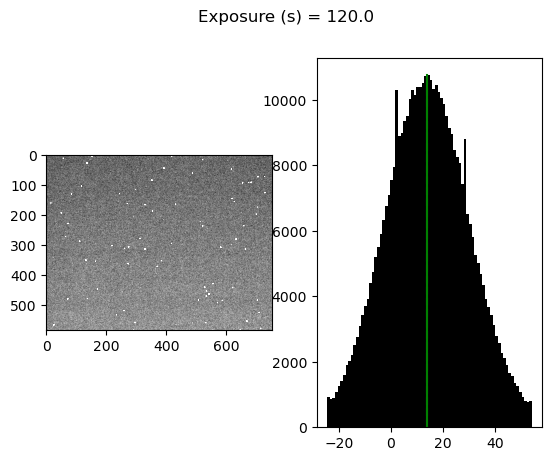

Read file  dark_19C_180s.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -22.25 60.75
mean, median, rms =  17.749858856201172 17.5 16.296428680419922


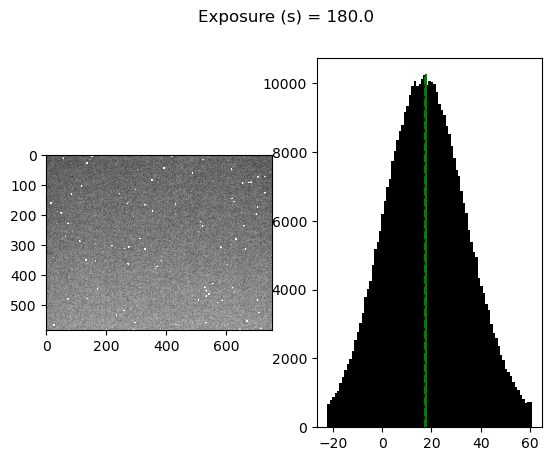

Read file  dark_19C_240s.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -19.75 64.0
mean, median, rms =  20.00010871887207 19.5 16.214859008789062


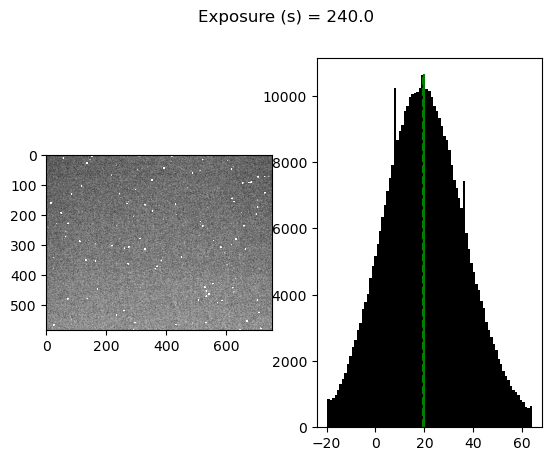

Read file  dark_19C_300s.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -11.25 80.5
mean, median, rms =  31.19502830505371 30.5 17.9849796295166


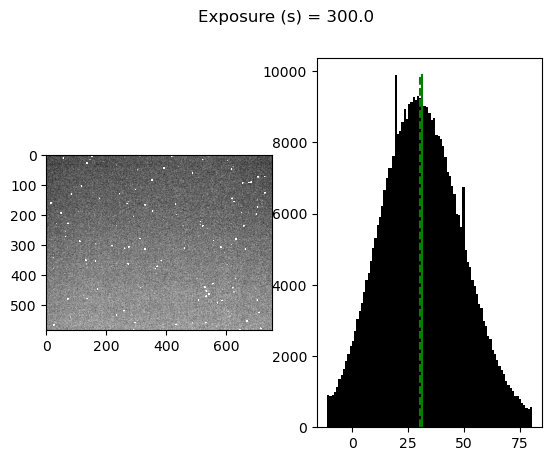

Read file  dark_19C_60s.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -23.25 58.5
mean, median, rms =  16.628381729125977 16.5 16.157514572143555


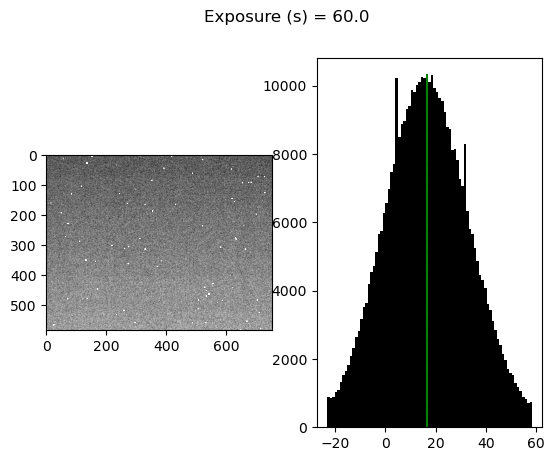

slope =  0.05583333333333333
intercept =  9.550000000000002
correlation coefficient r = 0.8267195934755006


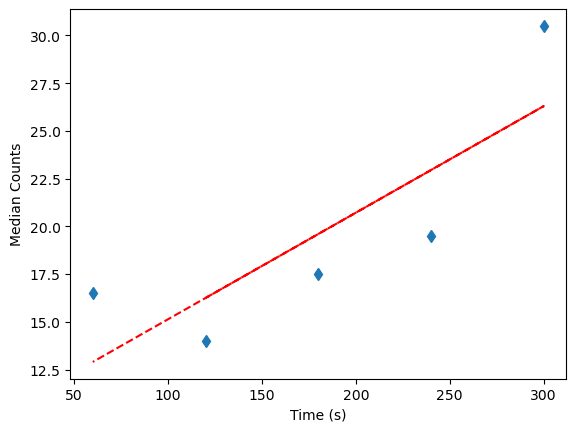

6
slope =  0.04410833333333334
intercept =  7.544499999999998
correlation coefficient r = 0.8267195934755008


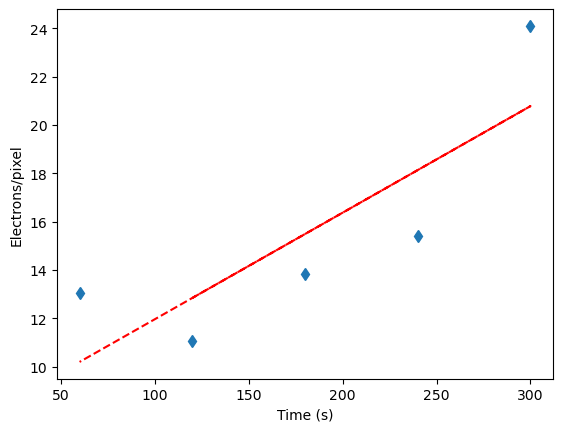

In [ ]:
# list of dark files
darkfile = glob('dark_19C_*.fits')
print(f"Darks: {darkfile}")

# array of corresponding times
# exposure = array([120.0, 180.0, 240.0, 300.0, 60.0])
exposure = array([0.0]*len(darkfile))
for i in range(len(darkfile)):
    header = pyfits.getheader(darkfile[i])
    exposure[i] = header['EXPTIME']
    
print(f"Exposure Times: {exposure}")

# arrays to hold results
c_mean = 0.0*exposure
c_median = 0.0*exposure
c_rms = 0.0*exposure

# wait after each set of plots
plt.ion()
colmap = plt.get_cmap('gray') # load gray colormap

# process the files
for i in range(len(darkfile)):
    # read in the file
    h = pyfits.open(darkfile[i])
    print('Read file ', darkfile[i])
    # copy the image data into a numpy (numerical python) array
    img = h[0].data
    h.close() # close the file
    # find the difference from the bias frames
    diff = img - bias
    # diff is a 2-d array, need to change to 1-d to make a histogram
    nx, ny = diff.shape # find the size of the array
    diffh = reshape(diff, nx*ny) # change the shape to be 1d
    # choose selection region
    f = 0.01 # ignore first and last fraction f of points
    s = sort(diffh)
    vmin = s[int(f*len(s))]
    vmax = s[int((1-f)*len(s))-1]
    print('Excluding lowest and highest pixels, fraction = ', f)
    print('bounds = ', vmin, vmax)
    # one figure with two plots
    plt.figure(i)
    plt.clf()
    plt.suptitle('Exposure (s) = '+str(exposure[i]))
    # plot the first image
    plt.subplot(121)
    plt.imshow(diff, cmap=colmap, vmin=vmin, vmax=vmax) # plot image using gray colorbar
    # plot the second image
    plt.subplot(122)
    # plot a histogram of the image values
    ht = plt.hist(diffh, bins=int(vmax-vmin), range=[vmin,vmax], histtype='stepfilled', color='k')
    nc = max(ht[0]) # maximum value in plotted histogram
    # select only values within ranges
    q = where((diffh >= vmin) & (diffh <= vmax))
    diffhcut = diffh[q]
    # find statistics
    c_mean[i] = mean(diffhcut)
    c_median[i] = median(diffhcut)
    c_rms[i] = std(diffhcut)
    print('mean, median, rms = ', c_mean[i], c_median[i], c_rms[i])
    plt.plot([c_mean[i], c_mean[i]], [0, nc], '-g')
    plt.plot([c_median[i], c_median[i]], [0, nc], '--g')
    plt.show() # display the plots

# plot median versus time
m = c_median
plt.figure(i+1)
plt.clf()
plt.xlabel('Time (s)')
plt.ylabel('Median Counts')
plt.plot(exposure, m, 'd')
# do a linear fit to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(exposure, m)
print('slope = ', slope)
print('intercept = ', intercept)
print('correlation coefficient r =', r_value)
# plot the fit
plt.plot(exposure, intercept + exposure*slope, '--r')
plt.show()

m = c_median
# We multiply the median counts with the gain of 0.79 e-/ADU to get e-/pixel
electrons = m * 0.79
plt.figure(i+2)
plt.clf()
plt.xlabel('Time (s)')
plt.ylabel('Electrons/pixel')
plt.plot(exposure, electrons, 'd')
# do a linear fit to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(exposure, electrons)
print('slope = ', slope)
print('intercept = ', intercept)
print('correlation coefficient r =', r_value)
# plot the fit
plt.plot(exposure, intercept + exposure*slope, '--r')
plt.show()

### 5.4 Dark Current vs Temperature

Bias Files: ['bias_11C.fits', 'bias_12C.fits', 'bias_14C.fits', 'bias_16C.fits']
Darks: ['dark_11C_60s.fits', 'dark_12C_60s.fits', 'dark_14C_60s.fits', 'dark_16C_60s.fits']
Read file  dark_11C_60s.fits
Using bias file  bias_11C.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -43.0 44.0
mean, median, rms =  -0.05831679701805115 0.0 17.23225975036621


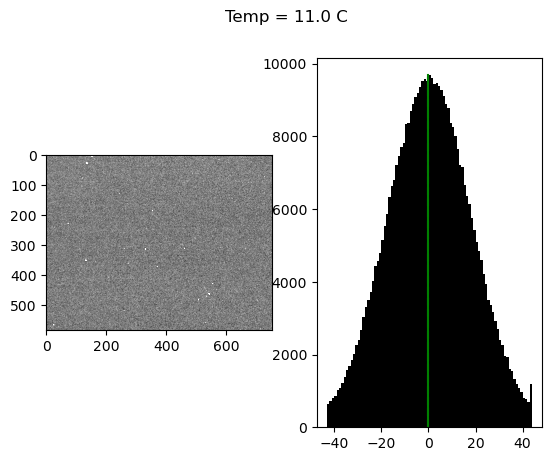

Read file  dark_12C_60s.fits
Using bias file  bias_12C.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -42.0 45.0
mean, median, rms =  1.362331748008728 1.0 17.189525604248047


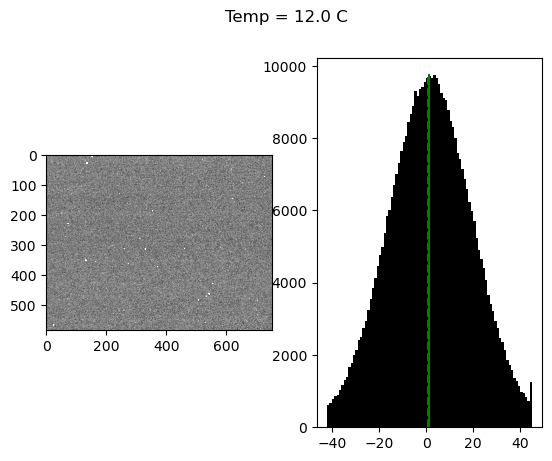

Read file  dark_14C_60s.fits
Using bias file  bias_14C.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -43.0 45.0
mean, median, rms =  1.2658872604370117 1.0 17.413299560546875


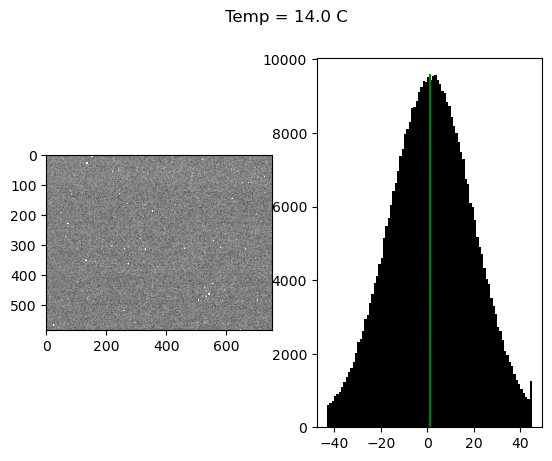

Read file  dark_16C_60s.fits
Using bias file  bias_16C.fits
Excluding lowest and highest pixels, fraction =  0.01
bounds =  -41.0 49.0
mean, median, rms =  3.42397403717041 3.0 17.69997787475586


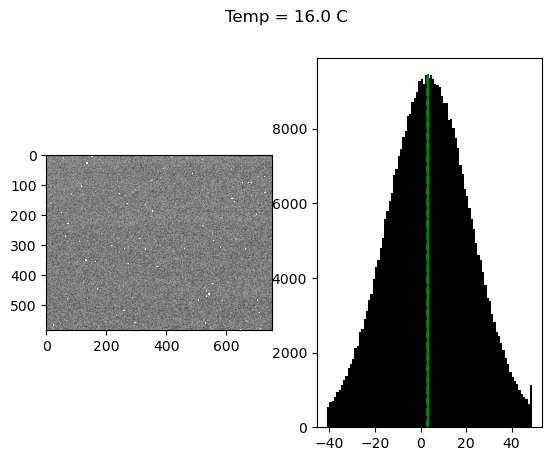

slope =  0.5254237288135594
intercept =  -149.2313559322034
correlation coefficient r = 0.9258889211887232


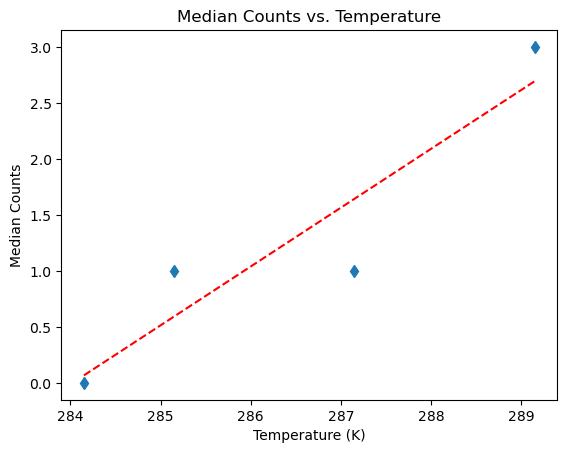

slope =  0.006918079096045199
intercept =  -1.9648795197740117
correlation coefficient r = 0.9258889211887232


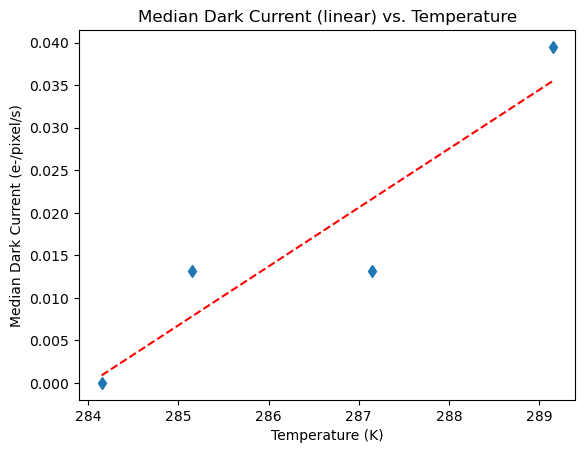

slope =  0.006918079096045199
intercept =  -1.9648795197740117
correlation coefficient r = 0.9258889211887232


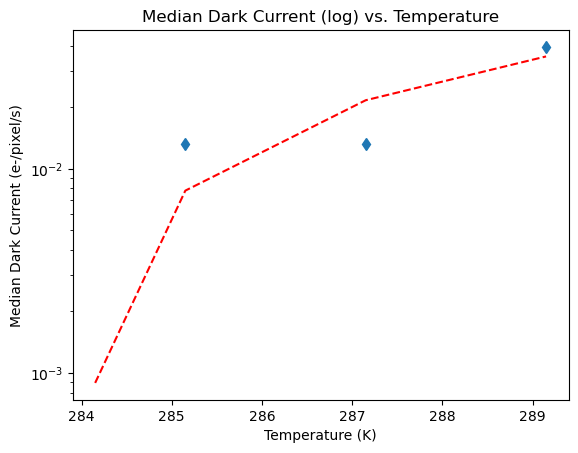

slope =  -2.879753384686231e-18
intercept =  368.00636771925565
correlation coefficient r = -0.903639577237009


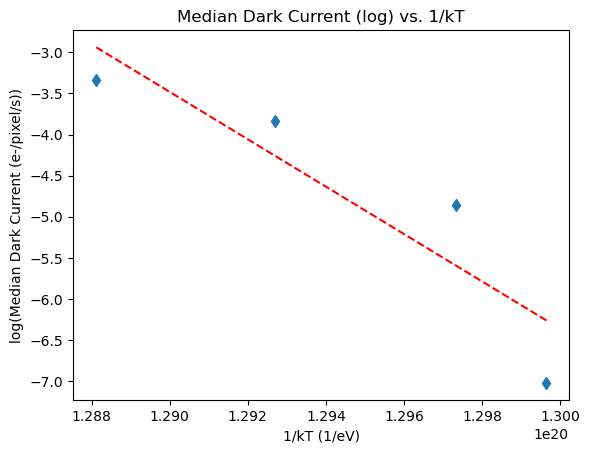

In [27]:
# Purposes: 
#   - calculate statistics of CCD dark images 
#   - fit a curve to dark count vs. time relation

# import needed extensions
from numpy import *
import matplotlib.pyplot as plt # plotting package
import matplotlib.cm as cm # colormaps
from scipy import stats
import astropy.io.fits as pyfits
from glob import glob
from astropy.constants import k_B

plt.ion()

# name of files containing the bias frames
biasfiles = glob('bias_*C.fits')
print(f"Bias Files: {biasfiles}")

# list of dark files
darkfile = glob('dark_*C_60s.fits')
darkfile = darkfile[:-1]
print(f"Darks: {darkfile}")


# single exposure time
exposure = 60.0

temps = array([11.0,12.0,14.0,16.0])
temps += 273.15 # convert to Kelvin

# wait after each set of plots
plt.ion()
colmap = plt.get_cmap('gray') # load gray colormap

# arrays to hold results
c_mean = 0.0*temps
c_median = 0.0*temps
c_rms = 0.0*temps

# process the files
for i in range(len(darkfile)):
    # read in the file
    h = pyfits.open(darkfile[i])
    print('Read file ', darkfile[i])
    # copy the image data into a numpy (numerical python) array
    img = h[0].data
    h.close() # close the file
    # find the difference from the bias frames
    bias = pyfits.getdata(biasfiles[i])
    print('Using bias file ', biasfiles[i])
    diff = img - bias
    # diff is a 2-d array, need to change to 1-d to make a histogram
    nx, ny = diff.shape # find the size of the array
    diffh = reshape(diff, nx*ny) # change the shape to be 1d
    # choose selection region
    f = 0.01 # ignore first and last fraction f of points
    s = sort(diffh)
    vmin = s[int(f*len(s))]
    vmax = s[int((1-f)*len(s))-1]
    print('Excluding lowest and highest pixels, fraction = ', f)
    print('bounds = ', vmin, vmax)
    # one figure with two plots
    plt.figure(i+7)
    plt.clf()
    plt.suptitle('Temp = '+str(temps[i] - 273.15) + ' C')
    # plot the first image
    plt.subplot(121)
    plt.imshow(diff, cmap=colmap, vmin=vmin, vmax=vmax) # plot image using gray colorbar
    # plot the second image
    plt.subplot(122)
    # plot a histogram of the image values
    ht = plt.hist(diffh, bins=int(vmax-vmin), range=[vmin,vmax], histtype='stepfilled', color='k')
    nc = max(ht[0]) # maximum value in plotted histogram
    # select only values within ranges
    q = where((diffh >= vmin) & (diffh <= vmax))
    diffhcut = diffh[q]
    # find statistics
    c_mean[i] = mean(diffhcut)
    c_median[i] = median(diffhcut)
    c_rms[i] = std(diffhcut)
    print('mean, median, rms = ', c_mean[i], c_median[i], c_rms[i])
    plt.plot([c_mean[i], c_mean[i]], [0, nc], '-g')
    plt.plot([c_median[i], c_median[i]], [0, nc], '--g')
    plt.show() # display the plots

# plot median versus temp
m = c_median
plt.figure(i+8)
plt.clf()
plt.title('Median Counts vs. Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Median Counts')
plt.plot(temps, m, 'd')
# do a linear fit to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(temps, m)
print('slope = ', slope)
print('intercept = ', intercept)
print('correlation coefficient r =', r_value)
# plot the fit
plt.plot(temps, intercept + temps*slope, '--r')
plt.show()

# plot dark current versus temp
m = c_median / exposure
m *= 0.79 # convert to electrons/pixel/s
plt.figure(i+9)
plt.clf()
plt.title('Median Dark Current (linear) vs. Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Median Dark Current (e-/pixel/s)')
plt.yscale('linear')
plt.plot(temps, m, 'd')
# do a linear fit to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(temps, m)
print('slope = ', slope)
print('intercept = ', intercept)
print('correlation coefficient r =', r_value)
# plot the fit
plt.plot(temps, intercept + temps*slope, '--r')
plt.show()

m = c_median / exposure
m *= 0.79 # convert to electrons/pixel/s
plt.figure(i+10)
plt.clf()
plt.title('Median Dark Current (log) vs. Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Median Dark Current (e-/pixel/s)')
plt.yscale('log')
plt.plot(temps, m, 'd')
# do a linear fit to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(temps, m)
print('slope = ', slope)
print('intercept = ', intercept)
print('correlation coefficient r =', r_value)
# plot the fit
plt.plot(temps, intercept + temps*slope, '--r')
plt.show()

dark_current_temp = log(intercept + temps*slope)
temps_kb = 1/ ((temps + 273.15) * k_B.value)
plt.figure(i+11)
plt.clf()
plt.title('Median Dark Current (log) vs. 1/kT')
plt.xlabel('1/kT (1/eV)')
plt.ylabel('log(Median Dark Current (e-/pixel/s))')
plt.plot(temps_kb, dark_current_temp, 'd')
# do a linear fit to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(temps_kb, dark_current_temp)
print('slope = ', slope)
print('intercept = ', intercept)
print('correlation coefficient r =', r_value)
# plot the fit
plt.plot(temps_kb, intercept + temps_kb*slope, '--r')
plt.show()